In [1]:
import numpy as np, pandas as pd

X = pd.read_parquet('datasets/aliens.parquet')
X

alfa_popsize  eyebrow_length  fenistraline_length    leash_v2  \
0      1273.210288      702.271017           352.754646  231.456804   
1      1762.800555      552.176524          -348.578448  302.617511   
2      1154.081932     1119.631765           -36.358379  200.098293   
3      1181.661571     1320.341225           293.866657  283.972621   
4       751.251638      998.132123          -724.730649  420.987379   
...            ...             ...                  ...         ...   
9995   1137.424408      688.857438           -90.263352  359.489998   
9996    913.314659      859.295109          -530.187880  245.904131   
9997   1133.345522     1042.954915          -755.420158  381.826616   
9998    713.240822      830.693428           -45.059154  262.265291   
9999   1029.131525     1110.227930           424.658106  270.220760   

      jacket_size  poloka_dash  holy_spirit     postojka  durk_durk_3d  \
0      135.162385   346.578535    70.388229   267.221799    162.812146   
1       66.096273   263.098188    -8.442866   199.800693    103.495658   
2      125.907321   334.439139   -20.265494  -519.780573     92.247154   
3       93.459372   187.442851    89.402673  1378.205958     81.806588   
4       60.963099   360.790557    -1.074858  1195.690980    121.554328   
...           ...          ...          ...          ...           ...   
9995   129.683610   204.562443    -2.465434  -673.451138     95.645700   
9996    77.807249   210.272221    25.786245  1590.171122     78.089080   
9997   116.520283   381.432154    18.509690   915.191240     89.055504   
9998   105.215648   321.509325   -19.198133  -647.714991    104.694268   
9999   117.226421   295.602108    85.767547  1572.206365    106.242811   

       noopster  ...  turilla_jet     weight  moonlight_shadow_angle  \
0     21.265403  ...    12.817179  15.780798             3988.159803   
1     29.978779  ...     9.937281  12.075288             5292.966511   
2     29.199713  ...    10.743006   8.756796             3856.035673   
3     35.836450  ...    12.429817  11.421948             2717.142060   
4     31.706275  ...    12.065884  13.341130             3085.229342   
...         ...  ...          ...        ...                     ...   
9995  30.638093  ...    11.031228  11.272852              853.655181   
9996  37.442741  ...    13.409530  13.714980             2348.817593   
9997  28.955985  ...    12.424673  12.504124             2797.610181   
9998  36.520347  ...     9.752806   9.727836             2166.196991   
9999  33.854686  ...    10.884281   8.297882             4186.539980   

      jister_ml  leg_pollution  wallet_size       biceps          aga  \
0     15.027182     105.348660    77.565442  2231.976885  3356.206251   
1     12.453356      86.882948    78.007788  3301.213697  5074.654575   
2      9.495362     116.418115   116.255086  3092.423116  3994.874963   
3     11.670682     131.664278    83.969841  3367.527054  2292.256561   
4      9.853778      65.249706   100.545740  3612.973208  2899.235214   
...         ...            ...          ...          ...          ...   
9995   9.978489      67.999854    80.942708  3128.648509  2521.916972   
9996  11.211519     126.782365   136.199706  3412.368087  3085.193759   
9997  11.842874     113.771209    76.383984  2972.426857  2482.928050   
9998  14.512985      75.965236    96.475552  4224.427711  1885.344082   
9999  14.232153      82.126478   101.082413  3281.196162  3892.482033   

              da  ankle_diameter  
0     293.846039     1197.658371  
1     351.400080      873.291874  
2     335.185582      917.447816  
3     351.901315     1074.534454  
4     381.034647     1291.965098  
...          ...             ...  
9995  324.780635      741.554471  
9996  371.102727      964.564360  
9997  185.922537      956.117409  
9998  320.413597     1465.775898  
9999  208.736878     1048.314327  

[10000 rows x 25 columns]

## 1. tool: EmbeddingPlotter (6 баллов)

Нужно написать функцию, которая принимает на вход 2D/3D эмбеддинг и отрисовывает его (можно и через класс).<br>
Требуемый функционал описан в докстринге.

Нужно заметить, что основные преимущества bokeh в этом задании не нужны, однако использование bokeh для 2D обязательно в целях минимального освоения.
В дальнейшем вы сможете усовершенствовать вашу рисовалку с помощью ColumnDataSource и коллбэков, если захотите.

In [ ]:
# !pip install bokeh

In [193]:
import numpy as np
import pandas as pd
from typing import List

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, HoverTool, Legend

import plotly.express as px

def embedding_plotter(embedding: np.ndarray, data: pd.DataFrame = None, hue: str = None, hover: str = None):
    '''
    Рисовалка эмбеддинга. 2D renderer: bokeh. 3D renderer: plotly.
    Обязательные инструменты:
        - pan (двигать график)
        - box zoom
        - reset (вылезти из зума в начальное положение)
    
        embedding: something 2D/3D, slicable ~ embedding[:, 0] - валидно
            Эмбеддинг
        data: pd.DataFrame
            Данные, по которым был построен эмбеддинг
        hue: string
            Колонка из data, по которой красим точки. Поддерживает интерактивную легенду: по клику на каждое
            значение hue можно скрыть весь цвет.
        hover: string or list of strings
            Колонк[а/и] из data, значения которых нужно выводить при наведении мышки на точку
            
    '''
    if embedding.shape[1] == 2:
        output_notebook()
        
        source = ColumnDataSource({"x": embedding[:, 0], "y": embedding[:, 1]})
        fig = figure(title="2D-embedding", tools="pan,box_zoom,reset")
        
        if data is not None and hue is not None:
            source.data["hue"] = data[hue].astype(str).values
            fig.scatter(
                'x', 'y', 
                color=factor_cmap(
                    field_name='hue', # название колонки из source
                    palette='Category10_3', # палитра
                    factors=data[hue].astype(str).unique() # все значения, используемые для цветов
                ),
                source=source, 
                legend_group='hue',
            )
            fig.legend.location = 'bottom_left'
            fig.legend.click_policy = 'hide'
        else:
            fig.scatter('x', 'y', source=source)
        
        if hover is not None:
            source.data["hover"] = data[hover].astype(str).values
            hover_tool = HoverTool(tooltips=([(hover, f'@{"hover"}')]))
            fig.add_tools(hover_tool)
        
        show(fig)

    
    if embedding.shape[1] == 3:
        params = {
            "x": embedding[:, 0],
            "y": embedding[:, 1],
            "z": embedding[:, 2]
        }

        if data is not None and hue is not None:
            params["data_frame"] = data
            params["color"] = data[hue]

        if hover is not None:
            params["hover_data"] = hover
        
        fig = px.scatter_3d(**params)
        fig.update_traces(marker_size=1, selector=dict(type='scatter3d')) 
        
        fig.show()

Приведите пример работы рисовалки на 2D и 3D данных. В качестве эмбеддингов возьмите какие-нибудь признаки из данных выше.

In [194]:
X['castom_colormap'] = np.zeros(X.shape[0])

mask = X[X.columns[0]].ge(1000.0) & X[X.columns[1]].ge(1000.0)
X.loc[mask, 'castom_colormap'] = 1

mask = X[X.columns[0]].le(1000.0) & X[X.columns[1]].le(1000.0)
X.loc[mask, 'castom_colormap'] = -1

In [195]:
embedding_plotter(X[X.columns[:2]].values, X, hue='castom_colormap', hover='fenistraline_length')

Loading BokehJS ...

In [571]:
embedding_plotter(X[X.columns[:3]].values, X, hue='castom_colormap', hover='leash_v2')

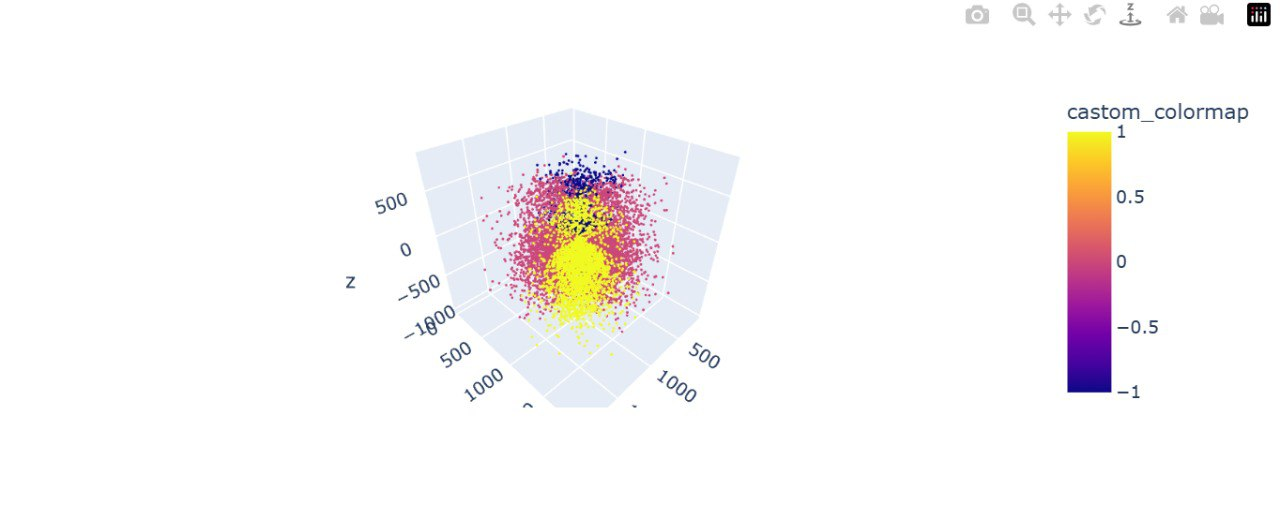

In [579]:
from IPython.display import Image
Image('plotly.jpg')

**! Если вы написали рисовалку, используйте ее в части 2 для отрисовки эмбеддингов**

## 2 Инопланетное вторжение

В разгар войны с инопланетянами в сеть утекли данные о десяти тысячах инопланетных особей, описанных странными показателями.
Никто не знает, что они значат, но все видят своими глазами, что среди инопланетян встречается пять существенно отличающихся видов, а также особи, которые трудно отнести к какому-либо виду.
Ваша задача по полученным данным произвести кибер-разведку и определить, к какому из видов относится каждый представленный в табличке субъект. Вы не знаете, как называются виды и чем именно из представленного в табличке они отличаются, но есть специалисты, готовые взять на себя подобную расшифровку.
Ваша задача - предоставить им разбиение данной таблички на кластеры (возможно, с шумом), чтобы они смогли начать анализ.

In [3]:
X.head()

alfa_popsize  eyebrow_length  fenistraline_length    leash_v2  jacket_size  \
0   1273.210288      702.271017           352.754646  231.456804   135.162385   
1   1762.800555      552.176524          -348.578448  302.617511    66.096273   
2   1154.081932     1119.631765           -36.358379  200.098293   125.907321   
3   1181.661571     1320.341225           293.866657  283.972621    93.459372   
4    751.251638      998.132123          -724.730649  420.987379    60.963099   

   poloka_dash  holy_spirit     postojka  durk_durk_3d   noopster  ...  \
0   346.578535    70.388229   267.221799    162.812146  21.265403  ...   
1   263.098188    -8.442866   199.800693    103.495658  29.978779  ...   
2   334.439139   -20.265494  -519.780573     92.247154  29.199713  ...   
3   187.442851    89.402673  1378.205958     81.806588  35.836450  ...   
4   360.790557    -1.074858  1195.690980    121.554328  31.706275  ...   

   turilla_jet     weight  moonlight_shadow_angle  jister_ml  leg_pollution  \
0    12.817179  15.780798             3988.159803  15.027182     105.348660   
1     9.937281  12.075288             5292.966511  12.453356      86.882948   
2    10.743006   8.756796             3856.035673   9.495362     116.418115   
3    12.429817  11.421948             2717.142060  11.670682     131.664278   
4    12.065884  13.341130             3085.229342   9.853778      65.249706   

   wallet_size       biceps          aga          da  ankle_diameter  
0    77.565442  2231.976885  3356.206251  293.846039     1197.658371  
1    78.007788  3301.213697  5074.654575  351.400080      873.291874  
2   116.255086  3092.423116  3994.874963  335.185582      917.447816  
3    83.969841  3367.527054  2292.256561  351.901315     1074.534454  
4   100.545740  3612.973208  2899.235214  381.034647     1291.965098  

[5 rows x 25 columns]

In [235]:
X.shape

(10000, 26)

### 2.1 Понижение размерности (4 балла)

Чтобы быть уверенным в своей кластеризации, нужно иметь возможность посмотреть на нее глазами, поэтому для начала постараемся получить 2D-эмбеддинг нашей таблички.
Сделайте это на всех признаках с помощью PCA и t-SNE/UMAP с адекватными гиперпараметрами (2 разных картинки). Сделайте необходимую предобработку. Отрисуйте это вашей рисовалкой из первой части, если вы ее сделали. Что вы видите?

In [519]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

embedding = PCA(2).fit_transform(StandardScaler().fit_transform(X.values))
embedding_plotter(embedding)

Loading BokehJS ...

In [520]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

embedding = PCA(2).fit_transform(X.values)
embedding_plotter(embedding)

Loading BokehJS ...

In [521]:
# ваш код
# ваши картинки
import umap
from sklearn.preprocessing import StandardScaler

embedding = umap.UMAP(
    n_neighbors=10,
    n_components=2,
    metric="euclidean",
    output_metric="euclidean",
    min_dist=0.2,

    verbose=True,
    init='pca', # spectral может зависать
    n_jobs=-1
).fit_transform(X.values)

embedding_plotter(embedding)

UMAP(init='pca', min_dist=0.2, n_neighbors=10, verbose=True)
Tue Dec 24 21:45:17 2024 Construct fuzzy simplicial set
Tue Dec 24 21:45:17 2024 Finding Nearest Neighbors
Tue Dec 24 21:45:17 2024 Building RP forest with 10 trees
Tue Dec 24 21:45:17 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Tue Dec 24 21:45:18 2024 Finished Nearest Neighbor Search
Tue Dec 24 21:45:18 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Dec 24 21:45:23 2024 Finished embedding


Loading BokehJS ...

In [288]:
embedding = umap.UMAP(
    n_neighbors=2000,
    n_components=2,
    metric="cosine",
    output_metric="euclidean",
    min_dist=0.2,

    verbose=True,
    init='pca', # spectral может зависать
    n_jobs=-1
).fit_transform(X.values)

embedding_plotter(embedding)

UMAP(angular_rp_forest=True, init='pca', metric='cosine', min_dist=0.2, n_neighbors=2000, verbose=True)
Tue Dec 24 00:28:51 2024 Construct fuzzy simplicial set
Tue Dec 24 00:28:51 2024 Finding Nearest Neighbors
Tue Dec 24 00:28:51 2024 Building RP forest with 10 trees
Tue Dec 24 00:28:51 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Tue Dec 24 00:30:45 2024 Finished Nearest Neighbor Search
Tue Dec 24 00:30:52 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Dec 24 00:31:15 2024 Finished embedding


Loading BokehJS ...

### ваш ответ на вопрос

Вижу, что в PCA после нормализации выделяется 6 или 9 (смотря как посмотреть) не очень четких кластеров, но пока что ничего ясного сказать нельзя, насколько хорошо это пространство разделяет 5 классов, т.к. PCA, на мой взгляд, плохо сохраняет глобальную структуру

В UMAP после кластеризации на числе соседей от 4 до 2_000 прослеживается одна и та же картина из 4-х кучек. Тут явно присутствует какой-то замысел. Чтобы лучше себе это представлять геометрически - взял косинусную меру сходства (она, к слову, ничем толком не отличается от евклидовой) и побольше соседей, чтобы больше доверять масштабу в 2D пространстве, тем не менее если полагаться на масштаб - так же не особо что ясно, т.к. точка из одной кучки может быть ближе к точке из другой кучки, нежели из той же самой

Давайте попробуем улучшить ситуацию. Найдите любым кажущимся вам разумным способом (опишите, что делали) то подмножество признаков, по которому разные виды инопланетян могут отличаться.
Постройте и отрисуйте на этом подмножестве признаков такой 2D-эмбеддинг, на котором данные однозначным и убедительным образом делятся на 5 кластеров (чем отчетливей и убедительней, тем больше баллов :).
Для этого, возможно, придется поиграться с гиперпараметрами методов понижения размерности.

In [5]:
# ваш поиск разумного подмноджества признаков
# опишите, что делаете и почему

### Посмотрим на корреляцию

скорее всего никакой линейной зависимости нет, а те значения что > 0.5 просто совпадение

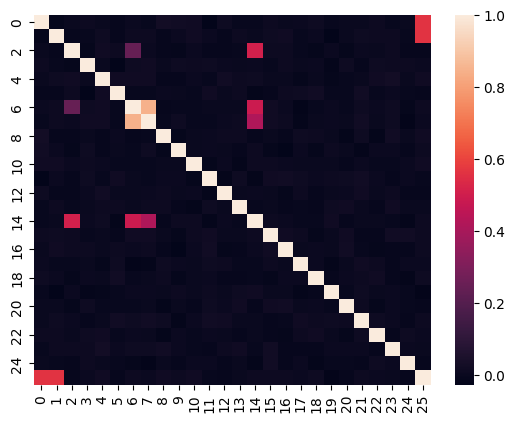

In [316]:
import seaborn as sns
sns.heatmap(numpy.corrcoef(X.values.T));

### Повыкидываем фичи

выкидывание этих фичей никак не влияет на вид эмбеддинга

а вот те, что остались - сильно меняют этот вид (выкидывал по 1 фиче и смотрел как меняется эмбеддинг)

In [523]:
mask = ( 
    (np.arange(X.shape[1]) != 0) &
    (np.arange(X.shape[1]) != 1) &  
    (np.arange(X.shape[1]) != 3) &
    (np.arange(X.shape[1]) != 4) &
    (np.arange(X.shape[1]) != 5) &
    (np.arange(X.shape[1]) != 6) & 
    (np.arange(X.shape[1]) != 8) &
    (np.arange(X.shape[1]) != 9) &
    (np.arange(X.shape[1]) != 11) &
    (np.arange(X.shape[1]) != 12) &
    (np.arange(X.shape[1]) != 13) &
    (np.arange(X.shape[1]) != 15) &
    (np.arange(X.shape[1]) != 16) &
    (np.arange(X.shape[1]) != 17) &
    (np.arange(X.shape[1]) != 18) &
    (np.arange(X.shape[1]) != 19) &
    (np.arange(X.shape[1]) != 20) &
    (np.arange(X.shape[1]) != 21) &
    (np.arange(X.shape[1]) != 22) &
    (np.arange(X.shape[1]) != 23) &
    (np.arange(X.shape[1]) != 24) &
    (np.arange(X.shape[1]) != 25) &
    (np.arange(X.shape[1]) != 26)
)
subcols = list(X.columns[mask])

In [524]:
# важные колонки, которые существенно влияют на форму embedding-а
subcols += ['holy_spirit']
subcols

['fenistraline_length', 'postojka', 'yi_212', 'baz200', 'holy_spirit']

### Посмотрим на распределения

действительно, таким "ручным" отбором выше удалось отобрать фичи с немного отличающимся распределением

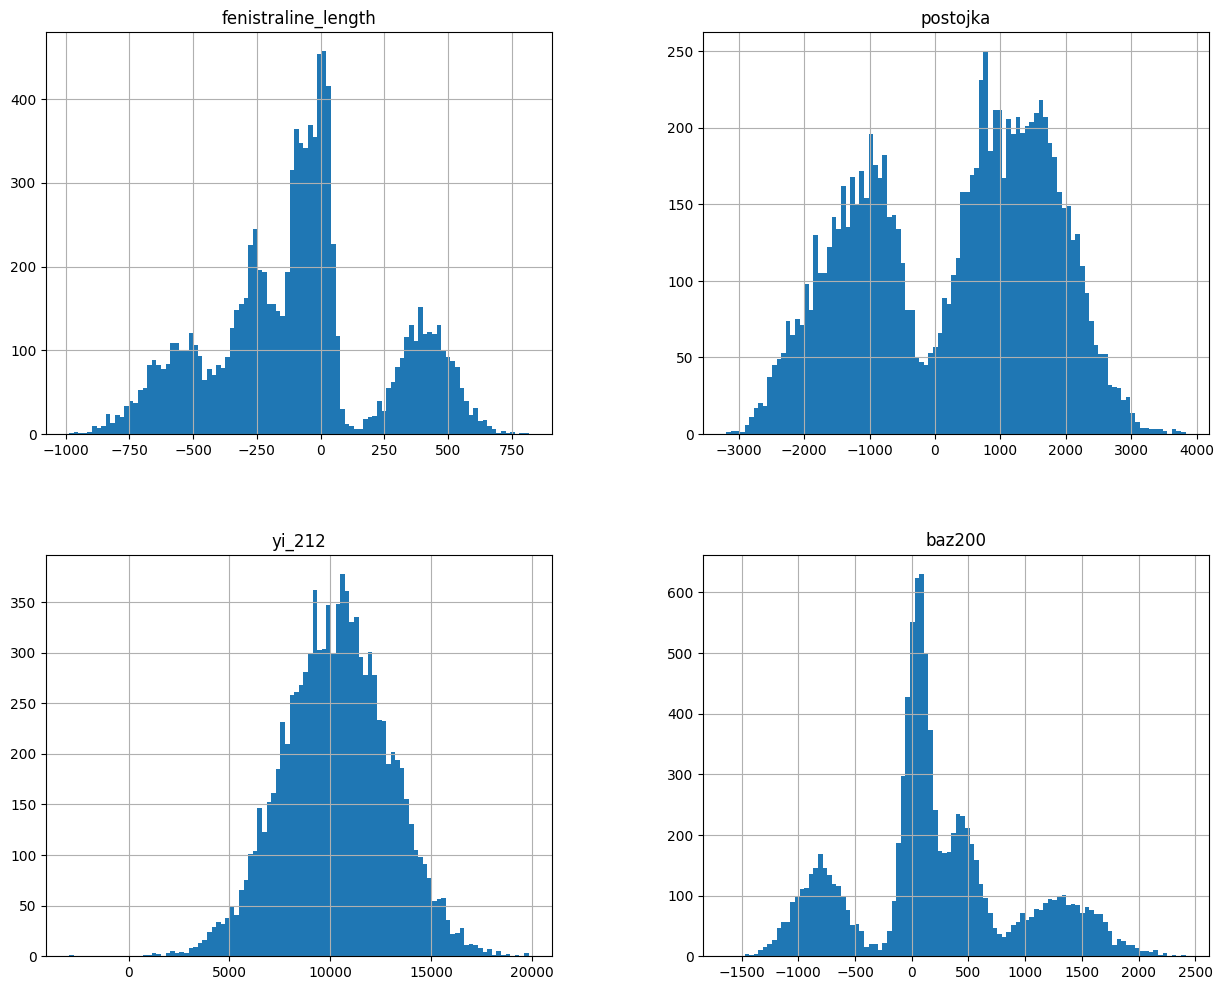

In [577]:
X[X.columns[mask]].hist(bins=100, figsize=(15, 12));

In [526]:
list(np.std(X[X.columns[mask]].values, axis=0))

[327.58077635574443, 1420.5427097734812, 2630.1178435010734, 720.0720386321208]

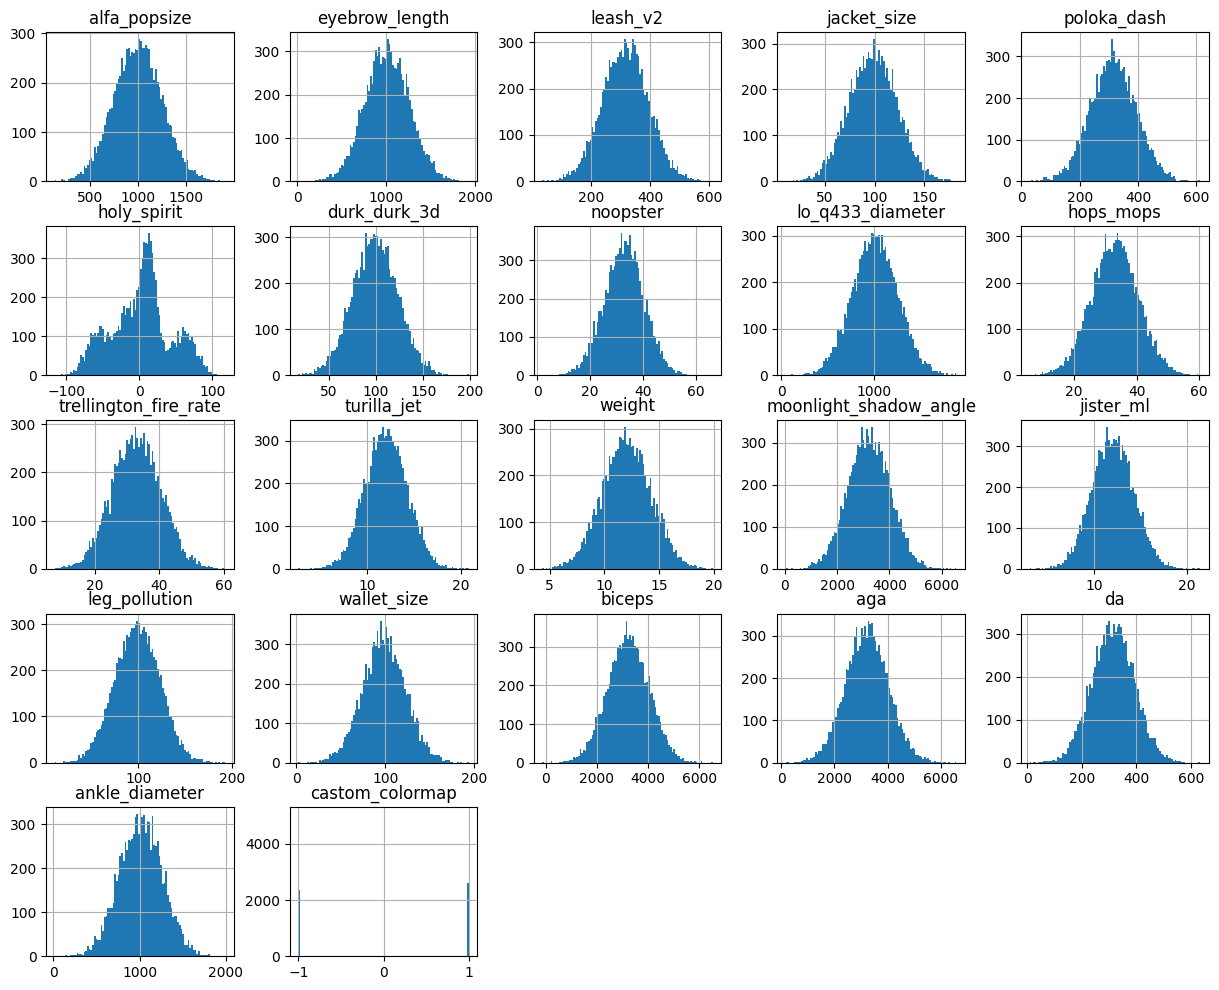

In [527]:
X[X.columns[~mask]].hist(bins=100, figsize=(15, 12));
#alfa_popsize	eyebrow_length	

In [528]:
list(np.std(X[X.columns[~mask]].values, axis=0))

[251.1859283703441,
 248.4488693159045,
 78.4455520481217,
 24.128851940058322,
 79.18508053782395,
 40.32359484846533,
 24.04181530740543,
 7.55969035329722,
 245.77129622505524,
 7.475338147917633,
 7.526087226403447,
 2.2530388519254654,
 2.2342135958450666,
 806.9345662025986,
 2.2462948106256864,
 23.950814406164,
 24.227901296579624,
 809.4943484171562,
 809.9182334172556,
 77.93531494504019,
 251.1870762371671,
 0.703599630471762]

In [433]:
# ваш код построения и отрисовки эмбеддинга
# ваша картинка

### Сделаем эмбеддинги 

в евлидовой метрике, кажется, ловить нечего

т.к. преобразовывать пространство это +- тоже самое (для понижения размерности), что поменять метрику, то попробуем перебрать метрики (что делается очень легко) и найти что-нибудь любопытное 

выходная метрика нужна скорее для визуализации, чем для нахождения структуры, поэтому её перебирать не будем

In [574]:
embedding = umap.UMAP(
    n_neighbors=2048,
    n_components=2,
    metric="canberra",
    #metric_kwds={"p": 4.5},
    output_metric="euclidean",
    min_dist=0.01,

    a=1.0,
    b=1.0,
    
    n_epochs=500,
    verbose=True,
    init='pca', # spectral может зависать
    n_jobs=-1
).fit_transform(
    X[subcols].values + np.mean(X[subcols].values, axis=1).reshape(-1, 1)
)
embedding_plotter(embedding)

UMAP(a=1.0, b=1.0, init='pca', metric='canberra', min_dist=0.01, n_epochs=500, n_neighbors=2048, verbose=True)
Tue Dec 24 22:46:44 2024 Construct fuzzy simplicial set
Tue Dec 24 22:46:44 2024 Finding Nearest Neighbors
Tue Dec 24 22:46:44 2024 Building RP forest with 10 trees
Tue Dec 24 22:46:44 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Tue Dec 24 22:49:27 2024 Finished Nearest Neighbor Search
Tue Dec 24 22:49:36 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Dec 24 22:49:54 2024 Finished embedding


Loading BokehJS ...

**поставил побольше соседей и не стал изменять параметры хвостов в 2d, чтобы больше доверять графику (т.к. один из пуктов - убедительность)**

### 2.2 Кластеризация (5 баллов)

Давайте теперь разобьем получившийся эмбеддинг на кластеры. Для этого выберите алгоритм кластеризации, который по-вашему сможет справиться с задачей.
Объясните свой выбор, а также выбор гиперпараметров. Запустите кластеризацию и отрисуйте получившиеся кластеры. Сделайте так, чтобы кластеры получились максимально адекватными (чем адекватней, тем больше баллов :).

In [ ]:
# ваш ответ

In [ ]:
# ваш код
# ваша картинка

Теперь у нас есть кластеризация, которую можно отправить специалистам! Это почти все!

Напоследок, попробуйте получить такую же кластеризацию, запустив алгоритм на пространстве размерности больше трех. Выберите адекватное подмножество признаков и алгоритм.
Выберите метрику качества кластеризации, которую будете использовать. Объясните свой выбор.

In [ ]:
# ваш ответ

С помощью optuna подберите гиперпараметры, которые дают наилучшую метрику качества кластеризации (нужно попробовать не менее 21 различных адекватных вариантов).
Запустите алгоритм кластеризации с наилучшими гиперпараметрами на выбранном подмножестве признаков и отрисуйте получившиеся кластеры на вашем полученном в части 2.1 эмбеддинге.

In [ ]:
# ваш код

Какие выводы можно сделать из увиденного?

In [ ]:
# ваш ответ

# Ура! Всем хорошего нового года!  |:--)

# Ураааааа! Гоооооооооооол!

In [578]:
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⣷⣄⠀⠀⠀⣀⣤⣤⣤⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣶⠏⠀⠀⣿⠀⢀⡾⠛⠋⠀⣾⣿⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⡏⠀⠀⠀⣿⢀⣾⠁⠀⣰⠆⢹⡿⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠃⣧⠀⠀⢠⡟⢸⡇⠀⣰⠟⠀⣼⠃⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣹⣆⢀⣸⣇⣸⠃⢠⡏⠀⣸⠋⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣀⣤⣴⣶⣶⣶⠾⠟⠛⠉⠉⠉⠈⠉⠉⠛⠁⢾⠁⣴⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣤⣤⣶⣶⠾⠟⠛⠛⣻⣿⣙⡁⠀⠀⢾⣶⣾⣷⣿⣶⣄⠀⠀⠀⠀⠰⢿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢀⣀⣀⣀⣠⣴⣶⣶⠾⠟⠛⠉⠉⠉⠀⠀⠀⠀⠀⣿⣻⣟⣻⣿⡦⠀⠘⣿⣿⣛⡿⢶⡇⠀⠀⠀⠀⠀⠀⢻⣆⠀⠀⠀⠀⠀⠀⠀⠀
⣠⣶⣶⣶⣾⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡟⠙⣿⣿⡗⠀⠀⠿⠉⣿⣿⣿⣶⠀⠀⠀⠀⠀⠀⠈⢿⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠳⣄⣿⡿⠁⠀⠀⠘⢦⣿⣿⠇⠟⠁⠀⠀⠀⠀⠀⠀⣸⡇⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⡇⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣇⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣿⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀
⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣇⡇⠀⠀⠀⠀⠀⠀⠀
⠀⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢤⣤⡀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠈⠙⢿⣿⣿⣿⣿⣿⣿⠟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣤⡾⠟⠛⠆⠀⠀⠀⠀⠀⢀⢻⡇⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠙⠿⣿⣭⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣤⣴⣶⠾⠟⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣾⠇⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠙⠛⠷⠶⢶⣶⣦⣤⣴⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣌⣿⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠙⠛⠛⠛⠃⠀⠀⠀⠀⠀⠀⠀⣤⣴⣾⣿⣿⣿⣓⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣼⣿⣷⣦⣄⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣀⣠⣤⣶⣾⣟⣯⣽⠟⠋⠀⠉⠳⣄⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⢇⠀⠉⠛⠷⣮⣍⣩⡍⢻⡟⠉⣉⢹⡏⠉⣿⣹⣷⣦⣿⠿⠟⠉⠀⠀⠀⠀⠀⠀⠙⣆⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠏⢸⠇⠀⠀⠀⠀⠀⠉⠉⠛⠛⠛⠛⠛⠛⠛⠋⠉⠉⠀⠀⠀⠀⠀⢠⣠⡶⠀⠀⠀⠀⠘⣧⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⡿⠀⣸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠟⠁⠀⠀⠀⠀⠀⠘⣆⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⠃⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⣇⡀⠀⠀⠀⠀⠀⠀⢹⡆⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣾⠀⣾⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣥⢠⣤⠼⠇⠀⠀⠘⣿⡄
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣽⡄⠈⢿⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣿⠿⠾⠷⠄⠀⠀⠀⢀⣿⠁
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣧⠀⠸⣷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣤⣾⠋⠀⠀⠀⠀⠀⠀⢰⣾⡿⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣦⣠⣿⣿⣶⣶⣤⣤⣄⣀⣀⣀⣀⠀⠀⠀⠀⠀⠀⠀⣀⣀⣠⣴⣿⣇⠀⠀⠀⠀⠀⠀⠀⣸⡟⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢻⣿⠀⠉⠛⢿⣿⣯⣿⡟⢿⠻⣿⢻⣿⢿⣿⣿⣿⣿⣿⠿⠟⠹⣟⢷⣄⠀⠀⠀⢀⣼⠟⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣄⠀⠀⠘⢷⣌⡻⠿⣿⣛⣿⣟⣛⣛⣋⣉⣉⣉⣀⡀⠀⠀⠈⠻⢿⣷⣶⣶⢛⣧⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣏⠀⠀⠀⠀⠹⢯⣟⣛⢿⣿⣽⣅⣀⡀⠀⣀⡀⠀⠀⠀⠠⢦⣀⠰⡦⠀⢸⠀⣏⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⡀⠀⠀⠀⠀⠀⠀⠈⠉⢻⣿⡟⠛⠉⠉⠁⠀⠀⠀⠀⠀⠀⠈⠛⠷⠀⣸⠀⣿⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣧⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⣿⡇⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⢿⠀⠀⢦⡀⡀⠀⠀⠀⠀⢹⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡄⡏⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡄⠀⠈⠳⣝⠦⢄⠀⠀⠀⣟⣷⠀⠀⠀⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⡇⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣄⣷⡀⠀⠀⠈⠙⠂⠀⠀⠀⢸⣿⡄⠀⠀⠘⢦⡙⢦⡀⠀⠀⠀⠀⢰⣷⣷⡇⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⡿⢧⣤⣀⡀⠀⠀⠀⠀⠀⠀⢿⣷⣄⠀⠀⠀⠁⠋⠀⠀⠀⠀⠀⢸⣿⣿⣇⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣷⡀⠈⠉⠛⠛⠛⠛⠛⠛⠛⠛⢿⡍⠛⠳⠶⣶⣤⣤⣤⣤⣤⣤⠼⠟⡟⢿⡇⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠰⣾⡇⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣤⣴⣿⣷⣶⣶⣶⣶⣶⣶⣦⣀⣀⣀⣻⡀⠀⠀⠀⣀⣀⠀⡀⠀⠀⠀⢀⣼⣿⠇⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⠟⠉⠁⠀⠀⠈⠻⣿⡆⢹⣯⣽⣿⣿⠟⠋⠙⣿⣶⣿⣿⣿⣿⣾⣿⣿⣿⣟⠋⠉⣇⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⠀⠀⡀⠀⠀⠀⠈⢻⣆⣿⠀⠀⠀⢁⣶⣿⠿⠟⠛⠷⣶⣽⣿⣿⣻⣏⠙⠃⣴⢻⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣷⣀⠀⠀⠉⠀⠀⠀⠀⠀⢹⣿⠀⣀⣴⣿⠋⠀⠀⠀⠀⠀⠀⠉⠻⣿⣧⣿⢀⣰⣿⣿⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢿⣶⣶⣤⣤⣤⣤⣤⣤⣾⣿⣟⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣅⣾⢿⣵⠇⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠛⠛⠛⠛⠛⠛⠛⠛⠉⠉⠉⠁⢹⣜⠷⠦⠤⠤⠤⠤⠤⠴⠶⠛⣉⣱⠿⠁⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠿⠷⣦⣤⣤⣄⣠⣤⣤⡶⠟⠁⠀⠀⠀⠀⠀⠀⠀

SyntaxError: invalid character '⠀' (U+2800) (4142129562.py, line 1)